## **Store Sales - Time Series Forecasting**

This data analysis project aims to forecast store sales using time series forecasting techniques. Time series forecasting involves predicting future values based on historical data points collected at regular intervals over time. In this project, we will analyze historical sales data from one or more stores to develop accurate forecasting models that can predict future sales trends.

#### Loading Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy
import random

In [2]:
data=pd.read_csv('Superstore.csv',index_col="Order ID")
data.head(3)

,Row ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order ID,,,,,,,,,,,,,,,,,,,,
CA-2016-152156,1,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
CA-2016-152156,2,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
CA-2016-138688,3,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [3]:
data.shape

(9994, 20)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, CA-2016-152156 to CA-2017-119914
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int

<AxesSubplot:>

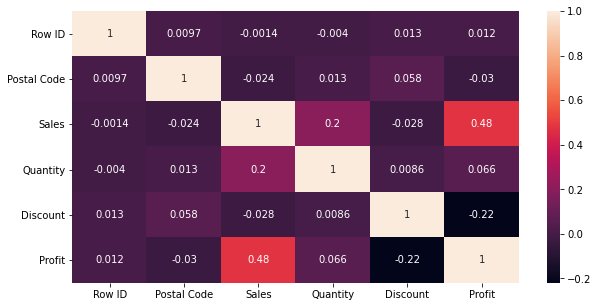

In [ ]:
#Seems like no null values found in the given dataset so creating correlation graph

plt.figure(figsize=(10,5))
sns.heatmap(data=data.corr(),annot=True)

In [7]:
#parsing dates
data["Order Date"]=pd.to_datetime(data["Order Date"])
data["Ship Date"]=pd.to_datetime(data["Ship Date"])


### **FINDING OUT INSIGHTS**

**INSIGHT 1:** 
Annual profit trends reveal fluctuations influenced by seasonal patterns, economic factors, and promotional activities, guiding strategic financial planning and resource allocation for store management.







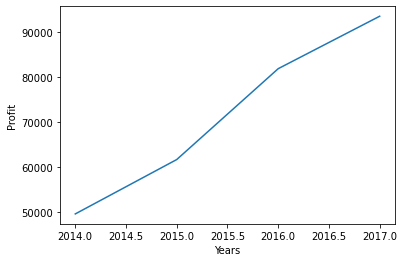

In [8]:
yearlyprofit = data.groupby(data["Order Date"].dt.year)["Profit"].sum()
plt.plot(yearlyprofit)

plt.xlabel('Years')
plt.ylabel('Profit')
plt.show()


Profit margins from 2014 to 2017 showcase an upward trajectory, spanning from $50,000 to $90,000 annually, reflecting sustained growth and financial stability within the observed period.

**INSIGHT 2:**  Monthly Profit


In [9]:
d2 = data.copy()

def plotMonth(var):
    print(f"\n\n {str(var).upper()}")
    yearlyData = d2[d2["Order Date"].dt.year == var]
    monthlyProfit = yearlyData.groupby(yearlyData["Order Date"].dt.month)["Profit"].sum()
    months = {1:"Jan",2: "Feb", 3:"Mar", 4:"Apr",5: "May",6: "June",7: "July", 8:"Aug", 9:"Sept",10: "Oct",11: "Nov",12: "Dec"}
    plt.plot(months.values(),monthlyProfit,color="orange")
    plt.xlabel('Months')
    plt.ylabel('Profit')
    plt.title("Monthly Profit")
    plt.show()
    for x in range(1,len(months)+1):
        print("{:6} {}".format(months[x],round(monthlyProfit[x],2)))




 2016


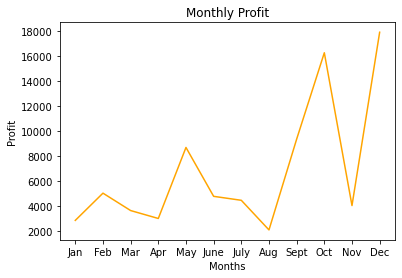

Jan    2824.82
Feb    5004.58
Mar    3611.97
Apr    2977.81
May    8662.15
June   4750.38
July   4432.88
Aug    2062.07
Sept   9328.66
Oct    16243.14
Nov    4011.41
Dec    17885.31


 2015


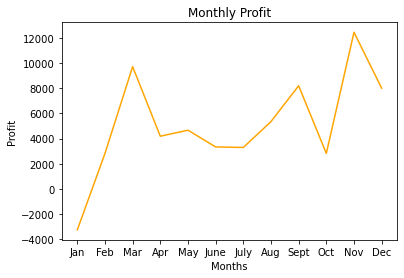

Jan    -3281.01
Feb    2813.85
Mar    9732.1
Apr    4187.5
May    4667.87
June   3335.56
July   3288.65
Aug    5355.81
Sept   8209.16
Oct    2817.37
Nov    12474.79
Dec    8016.97


 2014


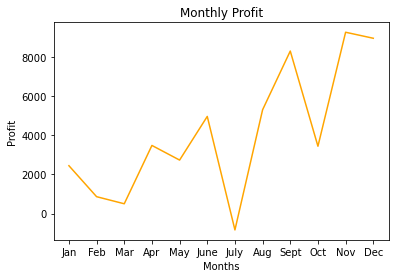

Jan    2450.19
Feb    862.31
Mar    498.73
Apr    3488.84
May    2738.71
June   4976.52
July   -841.48
Aug    5318.1
Sept   8328.1
Oct    3448.26
Nov    9292.13
Dec    8983.57


 2017


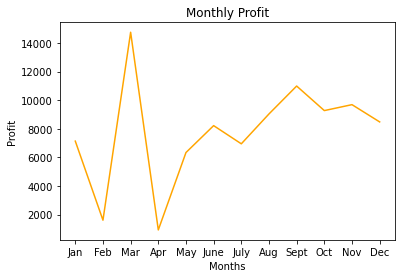

Jan    7140.44
Feb    1613.87
Mar    14751.89
Apr    933.29
May    6342.58
June   8223.34
July   6952.62
Aug    9040.96
Sept   10991.56
Oct    9275.28
Nov    9690.1
Dec    8483.35


In [10]:
for x in list(d2["Order Date"].dt.year.unique()):
    plotMonth(x)


**INSIGHT 3:** Yearly sales figures reveal crucial insights into the financial health and performance trajectory of a business.

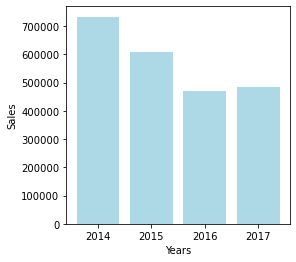

Order Date
2014    484247.4981
2015    470532.5090
2016    609205.5980
2017    733215.2552
Name: Sales, dtype: float64


In [11]:
a=data["Order Date"].dt.year.value_counts().index
b=data.groupby(data["Order Date"].dt.year)["Sales"].sum()
#plt.bar(b,list(a))
plt.figure(figsize=(4,4))
plt.bar(a,b,color='lightblue')
plt.xlabel("Years")
plt.ylabel("Sales")
plt.show()
print(b)

**Insight 4:** Most Demanded Product

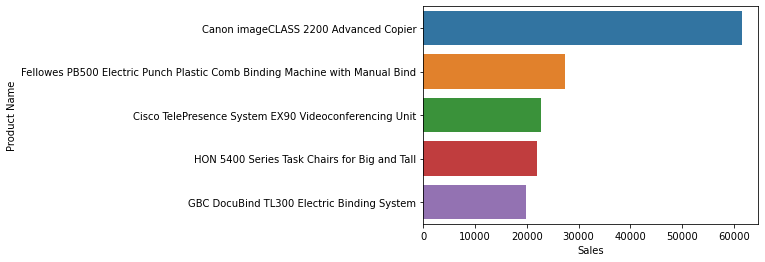

In [12]:
productSales = data.groupby(["Product Name"])["Sales"].sum()
productSales= pd.DataFrame(productSales)
TopSoldProducts = productSales.sort_values(by=["Sales"],ascending=False).head()
TopSoldProducts
sns.barplot(x=TopSoldProducts["Sales"],y=TopSoldProducts.index)
plt.show()

**Insight 5:** Least Demanded Product

In [13]:
LeastSold = productSales.sort_values(by=["Sales"],ascending=True).head()
LeastSold

,Sales
Product Name,
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac,1.624
Avery 5,5.760
Xerox 20,6.480
Grip Seal Envelopes,7.072
Avery Hi-Liter Pen Style Six-Color Fluorescent Set,7.700


**INSIGHT 6 :** Analyzing sales per state unveils geographic trends and opportunities, informing targeted marketing and distribution strategies

In [14]:
import random

def setID(s):
    f= random.randint(1,100)
    return s[:4].upper()
data["State Id"] = data["State"].apply(setID)+data["Country"].apply(setID)


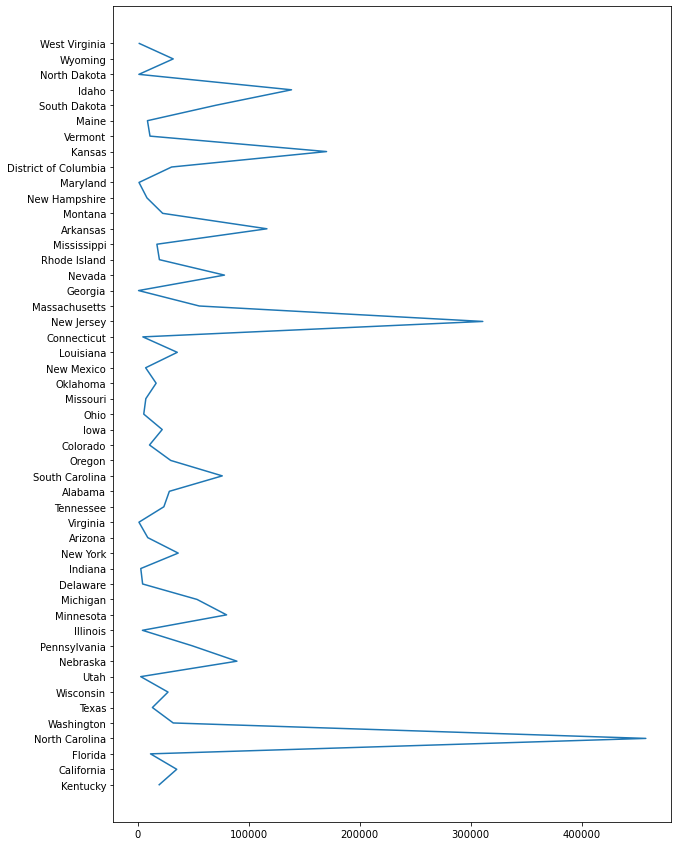

State
Alabama                  19510.6400
Arizona                  35282.0010
Arkansas                 11678.1300
California              457687.6315
Colorado                 32108.1180
Connecticut              13384.3570
Delaware                 27451.0690
District of Columbia      2865.0200
Florida                  89473.7080
Georgia                  49095.8400
Idaho                     4382.4860
Illinois                 80166.1010
Indiana                  53555.3600
Iowa                      4579.7600
Kansas                    2914.3100
Kentucky                 36591.7500
Louisiana                 9217.0300
Maine                     1270.5300
Maryland                 23705.5230
Massachusetts            28634.4340
Michigan                 76269.6140
Minnesota                29863.1500
Mississippi              10771.3400
Missouri                 22205.1500
Montana                   5589.3520
Nebraska                  7464.9300
Nevada                   16729.1020
New Hampshire         

In [15]:
# sales per state
plt.figure(figsize=(10,15))
plt.plot(data.groupby("State")["Sales"].sum(),data["State"].unique())
plt.show()
data.groupby("State")["Sales"].sum()
